<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/3D-CNN/2020_11_05__labeled_cube_extraction_3DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import imageio as iio
import matplotlib.pyplot as plt

In [3]:
# -- set the file names
pname = "/content/drive/My Drive/urban_heat/output/paths_times.csv"
fpaths = pd.read_csv(pname)
fpaths = fpaths[(fpaths.time >= "2020-03-14 00:00:00") & 
                (fpaths.time < "2020-03-14 04:00:00")]
fpaths = fpaths.path.values

print("there are {0} files between midnight and 4am on 03/14/20" \
      .format(len(fpaths)))

# -- only take the first 100 images
fpaths = fpaths[:100]

# -- read in the 0th image to get the image shape
img0 = np.asarray(iio.imread(fpaths[0]))[:, :, 0] / 255.
nrow, ncol = img0.shape


# -- initialize an array to hold all of the images
imgs = np.zeros((len(fpaths), nrow, ncol))


# -- read in the images
for ii, fname in enumerate(fpaths):
  if ii % 20 == 0:
    print("working on the {0} image".format(ii))

  imgs[ii, :, :] = np.asarray(iio.imread(fname))[:, :, 0] / 255.

there are 1435 files between midnight and 4am on 03/14/20
working on the 0 image
working on the 20 image
working on the 40 image
working on the 60 image
working on the 80 image


In [4]:
imgs[ii, :, :].shape

(240, 320)

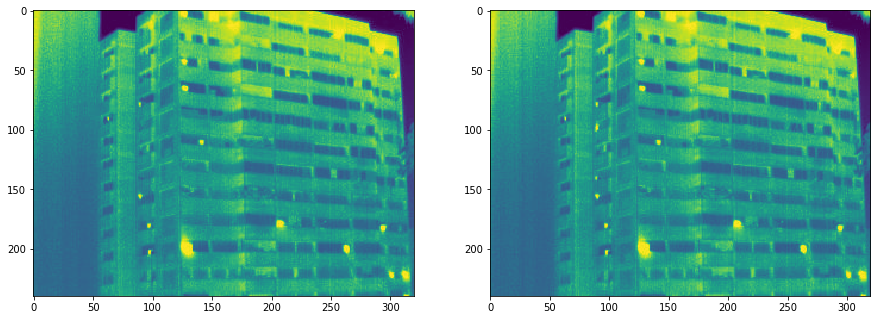

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7])
ax[0].imshow(imgs[20], interpolation="nearest")
ax[1].imshow(imgs[40], interpolation="nearest")
fig.show()

In [6]:
# -- read in the labeled pixels
acs = np.load("/content/drive/My Drive/urban_heat/output/acs_pix.npy")
bld = np.load("/content/drive/My Drive/urban_heat/output/bld_pix.npy")
#sky = np.load("/content/drive/My Drive/urban_heat/output/sky_pix.npy")
sky = np.load("/content/drive/My Drive/urban_heat/output/sky_pix_20201112.npy")
win = np.load("/content/drive/My Drive/urban_heat/output/win_pix.npy")

# -- convert to pixel numbers
acs_col, acs_row = acs.round().astype(int).T
bld_col, bld_row = bld.round().astype(int).T
sky_col, sky_row = sky.round().astype(int).T
win_col, win_row = win.round().astype(int).T

# -- extract features from images
feat_acs = imgs[:, acs_row, acs_col].T
feat_bld = imgs[:, bld_row, bld_col].T
feat_sky = imgs[:, sky_row, sky_col].T
feat_win = imgs[:, win_row, win_col].T

# -- determine the shape of these images so that we know how to set up the convnet
acs_sh = acs.shape
bld_sh = bld.shape
sky_sh = sky.shape
win_sh = win.shape
acs_sh, bld_sh, sky_sh, win_sh

((30, 2), (100, 2), (30, 2), (30, 2))

In [7]:
#print(sky)
#print(sky_row)
#print(sky_col)
#len(sky_row), len(sky_col)

In [8]:
# -- extract features from images
#feat_acs = imgs[:, acs_row, acs_col].T
#feat_bld = imgs[:, bld_row, bld_col].T
#feat_sky = imgs[:, sky_row, sky_col].T
#feat_win = imgs[:, win_row, win_col].T

In [9]:
#plt.imshow(feat_bld, aspect="auto", interpolation="nearest")

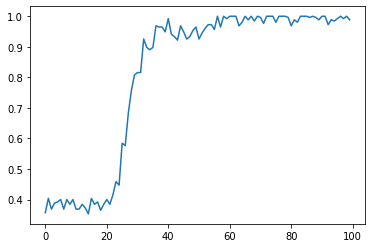

In [10]:
plt.plot(imgs[:, 99, 90])

In [11]:
#cube = imgs[:, 99-5:99+6, 90-5:90+6]

In [12]:
# Sky
feat_sky = []

for ii in range(len(sky_row)):
  trow = sky_row[ii]
  tcol = sky_col[ii]
  feat_sky.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_sky = np.array(feat_sky)
print(feat_sky.shape)

(30, 11, 11, 100)


In [13]:
#for ii in range(30):
  #print(feat_sky[ii].shape)

In [14]:
# Make features

# Air conditioner

feat_acs = []

for ii in range(len(acs_row)):
  trow = acs_row[ii]
  tcol = acs_col[ii]
  feat_acs.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_acs = np.array(feat_acs)
print(feat_acs.shape)

# Building
feat_bld = []

for ii in range(len(bld_row)):
  trow = bld_row[ii]
  tcol = bld_col[ii]
  feat_bld.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_bld = np.array(feat_bld)
print(feat_bld.shape)

# Sky
feat_sky = []

for ii in range(len(sky_row)):
  trow = sky_row[ii]
  tcol = sky_col[ii]
  feat_sky.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_sky = np.array(feat_sky)
print(feat_sky.shape)

# Window
feat_win = []

for ii in range(len(win_row)):
  trow = win_row[ii]
  tcol = win_col[ii]
  feat_win.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_win = np.array(feat_win)
print(feat_win.shape)

(30, 11, 11, 100)
(100, 11, 11, 100)
(30, 11, 11, 100)
(30, 11, 11, 100)


In [15]:
# -- determine the shape of these images so that we know how to set up the convnet
#feat_acs_sh = feat_acs.shape
#feat_bld_sh = feat_bld.shape
#feat_sky_sh = feat_sky.shape
#feat_win_sh = feat_win.shape
#feat_acs_sh, feat_bld_sh, feat_sky_sh, feat_win_sh

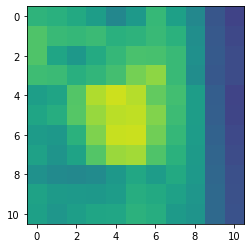

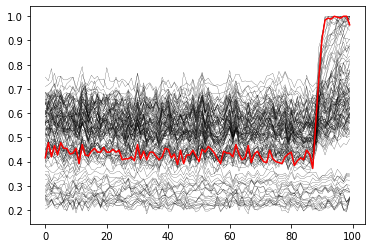

In [16]:
# Plot air conditioner
ind = 9
plt.imshow(feat_acs[ind][:, :, 90], clim=[0, 1])
plt.figure()
dum = plt.plot(feat_acs[ind].reshape(121, 100).T, "k", lw=0.2)
#dum = plt.plot(feat_acs[ind].reshape(121, 1435).T, "k", lw=0.2)
dum = plt.plot(feat_acs[ind][5, 5], "r")

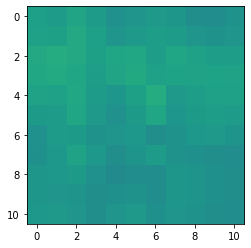

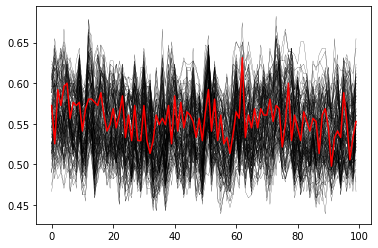

In [17]:
# Plot building
ind = 90
plt.imshow(feat_bld[ind][:, :, 90], clim=[0, 1])
plt.figure()
dum = plt.plot(feat_bld[ind].reshape(121, 100).T, "k", lw=0.2)
#dum = plt.plot(feat_bld[ind].reshape(121, 1435).T, "k", lw=0.2)
dum = plt.plot(feat_bld[ind][5, 5], "r")

In [18]:
# Feature
#feat = np.vstack([feat_acs, feat_bld])
feat = np.vstack([feat_acs, feat_bld, feat_sky, feat_win])
print(feat.shape)
# standardize the features
#feat = (feat - feat.mean(axis=1, keepdims=True)) / feat.std(axis=1, keepdims=True)

(190, 11, 11, 100)


In [19]:
# Target 
# initialize target array
labs_acs = np.zeros(acs.shape[0])
labs_bld = np.zeros(bld.shape[0]) + 1
labs_sky = np.zeros(sky.shape[0]) + 2
labs_win = np.zeros(win.shape[0]) + 3
#targ = np.hstack([labs_acs, labs_bld])
targ = np.hstack([labs_acs, labs_bld, labs_sky, labs_win])

In [20]:
# -- create a training/testing sample
from sklearn.model_selection import train_test_split
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.20, random_state=314)
print(feat.shape)
print(targ.shape)
print(feat_tr.shape)
print(targ_tr.shape)
print(feat_te.shape)
print(targ_te.shape)

(190, 11, 11, 100)
(190,)
(152, 11, 11, 100)
(152,)
(38, 11, 11, 100)
(38,)


# 3D Convolutional Neural Network 

In [21]:
import numpy as np
import keras
from keras.layers import Conv3D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution3D, MaxPooling3D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K

In [22]:
# Conv3D
conv0  = keras.layers.Conv3D(32, kernel_size=(5, 5, 5), padding="same", activation="relu", input_shape=(11,11,100, 1))
pool0  = keras.layers.MaxPooling3D((2, 2, 2), strides=2)
drop0   = keras.layers.Dropout(0.5)

conv1  = keras.layers.Conv3D(64, kernel_size=(5, 5, 5), padding="same", activation="relu")
pool1  = keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=2)
drop1   = keras.layers.Dropout(0.5)

conv2  = keras.layers.Conv3D(64, kernel_size=(5, 5, 5), padding="same", activation="relu")
pool2  = keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=2)
drop2   = keras.layers.Dropout(0.5)

flat   = keras.layers.Flatten()
fconn  = keras.layers.Dense(1024, activation="relu")
drop3   = keras.layers.Dropout(0.5)

#output = keras.layers.Dense(2, activation="softmax")
output = keras.layers.Dense(4, activation="softmax")

layers = [conv0, pool0, drop0, flat, fconn, drop3, output]

# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
#model.summary()

In [24]:
# reshape 
feat_tr = feat_tr.reshape(feat_tr.shape[0], feat_tr.shape[1], feat_tr.shape[2], 100, 1)
feat_te = feat_te.reshape(feat_te.shape[0], feat_te.shape[1], feat_te.shape[2], 100, 1)

#feat_tr = feat_tr.reshape(feat_tr.shape[0], feat_tr.shape[1], feat_tr.shape[2], 1435, 1)
#feat_te = feat_te.reshape(feat_te.shape[0], feat_te.shape[1], feat_te.shape[2], 1435, 1)

In [25]:
feat_tr.shape[0], feat_tr.shape[1], feat_tr.shape[2], feat_te.shape[0], feat_te.shape[1], feat_te.shape[2]

(152, 11, 11, 38, 11, 11)

In [26]:
# -- fit the training data
#history = model.fit(feat_tr, targ_tr, epochs=100, batch_size=10)
history = model.fit(feat_tr, targ_tr, epochs=10, batch_size=10)

Epoch 1/10
16/16 [==============================] - 0s 17ms/step - loss: 1.6176 - accuracy: 0.5263
Epoch 2/10
16/16 [==============================] - 0s 15ms/step - loss: 0.5939 - accuracy: 0.8026
Epoch 3/10
16/16 [==============================] - 0s 14ms/step - loss: 0.3752 - accuracy: 0.8618
Epoch 4/10
16/16 [==============================] - 0s 15ms/step - loss: 0.3035 - accuracy: 0.9145
Epoch 5/10
16/16 [==============================] - 0s 15ms/step - loss: 0.2787 - accuracy: 0.9342
Epoch 6/10
16/16 [==============================] - 0s 15ms/step - loss: 0.2486 - accuracy: 0.9079
Epoch 7/10
16/16 [==============================] - 0s 15ms/step - loss: 0.1641 - accuracy: 0.9737
Epoch 8/10
16/16 [==============================] - 0s 15ms/step - loss: 0.2555 - accuracy: 0.9474
Epoch 9/10
16/16 [==============================] - 0s 15ms/step - loss: 0.1248 - accuracy: 0.9605
Epoch 10/10
16/16 [==============================] - 0s 14ms/step - loss: 0.1175 - accuracy: 0.9803


In [27]:
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr)
loss_te, acc_te = model.evaluate(feat_te, targ_te)

print("TRAINING accuracy : {0:.4f}".format(acc_tr))
print("TESTING accuracy  : {0:.4f}".format(acc_te))

2/2 [==============================] - 0s 5ms/step - loss: 0.2358 - accuracy: 0.9474
TRAINING accuracy : 0.9868
TESTING accuracy  : 0.9474


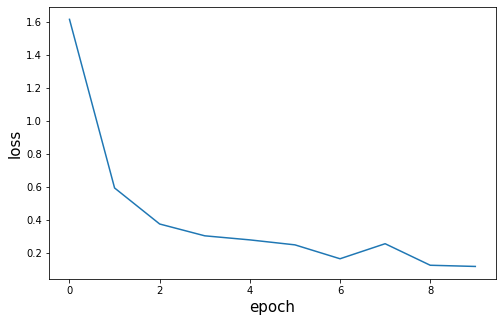

In [28]:
# -- plot the loss function
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(history.history["loss"])
ax.set_xlabel("epoch", fontsize=15)
ax.set_ylabel("loss", fontsize=15)
fig.show()

# Model evaluation

In [29]:
from sklearn.metrics import confusion_matrix

# -- predict the training data
pred_te = model.predict(feat_te)

# -- set a threshold for detection
thresh = 0.99

# -- determine the confusion matrix
conf = confusion_matrix(targ_te, pred_te[:, 1] > thresh)

print("confusion matrix : \n{0}".format(conf))

confusion matrix : 
[[ 8  0  0  0]
 [14  6  0  0]
 [ 6  0  0  0]
 [ 4  0  0  0]]


In [33]:
from sklearn.metrics import roc_curve

# -- generate ROC curve
#pred_te = model.predict(feat_te)
#roc = roc_curve(targ_te, pred_te[:, 1] )

# -- plot it
#fig, ax = plt.subplots(figsize=(8, 5))
#ax.plot(roc[0], roc[1], color="darkred", lw=2)
#ax.set_xlabel("FPR")
#ax.set_ylabel("TPR")
#fig.show()

In [34]:
from sklearn.metrics import precision_recall_fscore_support

# -- calculate precision and recall
pred_img = 1 * (pred_te[:, 0] < pred_te[:, 1])
prec, recall, fbeta, support = precision_recall_fscore_support(targ_te, pred_img)

print("precision : {0:.3f}".format(prec[1]))
print("recall    : {0:.3f}".format(recall[1]))
print("support   : {0}".format(support))

precision : 0.690
recall    : 1.000
support   : [ 8 20  6  4]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
